# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [2]:
import numpy as np
a = np.array([[1,2,3],[2,3,1]])
b = np.array([-1,4,3])
c = a @ b
c

array([16, 13])

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from   scipy import signal

In [4]:
#Obtencion del la matriz A_H (Alineo los samples para poder operar despues)
def align_samples(samples_vector,ncoeffs):
    #De tener 20 muestras y 4 Coeficientes del filtro, las columnas de AH son 17
    columns = np.size(samples_vector) - ncoeffs + 1
    rows    = ncoeffs
    AH      = np.zeros((rows,columns))
    for i in np.arange(columns):
        AH[:,i] =samples_vector[np.arange(ncoeffs+i-1,-1+i,-1)]
    return AH
#Funcion para obtener los coeficientes del filtro de Wiener. Tener en cuenta que el numero de coeficientes
#del filtro esta embebido en la matriz H
def wiener_coeffs(AH,D):
    AUTO_CORR   = AH@AH.transpose()
    CROSS_CORR  = AH@D
    W           = inv(AUTO_CORR)@CROSS_CORR  
    return W
#Funcion para obtener el error cuadratico medio que se obtiene con el filtro de wiener
def minimum_mse(AH,D):
    DH = D.transpose()
    A =  AH.transpose()
    emin = DH@D - DH@A@inv(AH@A)@AH@D
    return emin

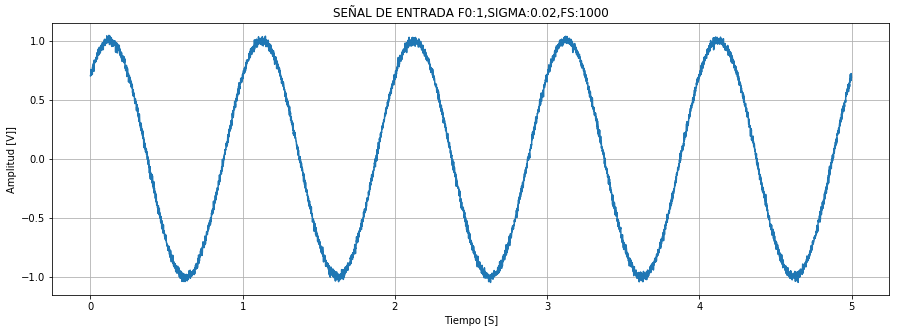

In [5]:
#Parametros del experimento
plt.rcParams['figure.figsize'] = [15, 5]

sigma   = 0.02
ncoeffs = 4
f0      = 1 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

plt.figure()
plt.plot(tt,input_signal)
plt.title('SEÑAL DE ENTRADA F0:{},SIGMA:{},FS:{}'.format(f0,sigma,fs))
plt.xlabel('Tiempo [S]')
plt.ylabel('Amplitud [V]]')
plt.grid()
plt.show()

ERROR CUADRATICO MEDIO MINIMO:0.7189557710244117


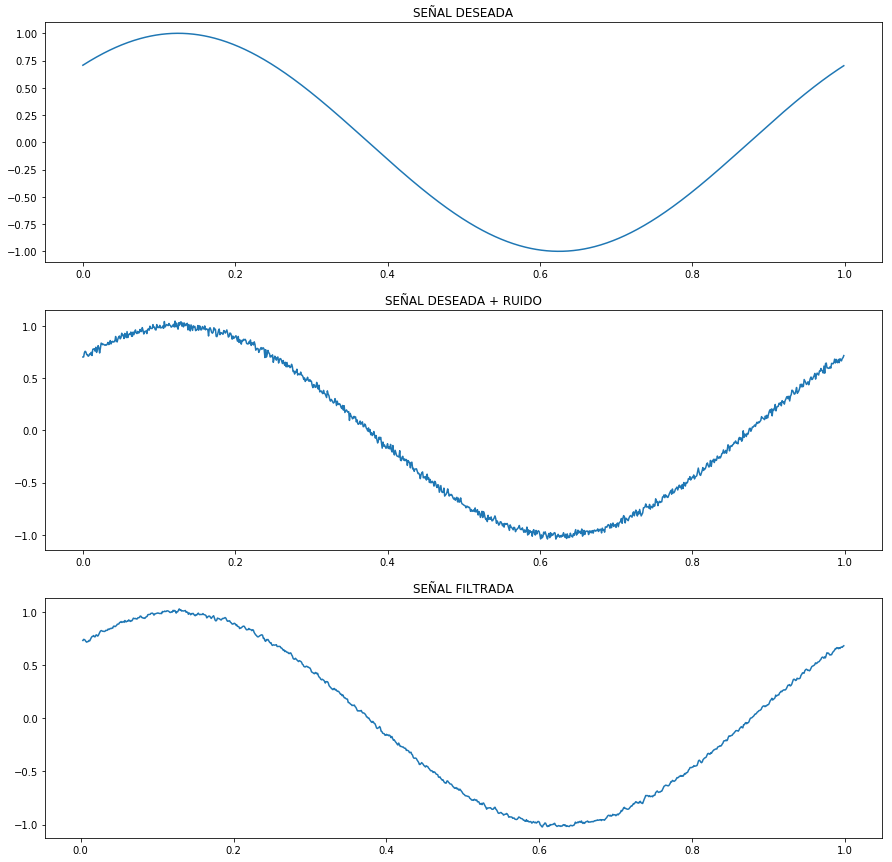

In [6]:
#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[:1000],d[:1000])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[:1000],input_signal[:1000])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
plt.plot(tt_desired[:1000-ncoeffs],d_est[:1000-ncoeffs])
                 
#Claramente vemos que el ruido disminuye

ERROR CUADRATICO MEDIO MINIMO:304.45627376113634


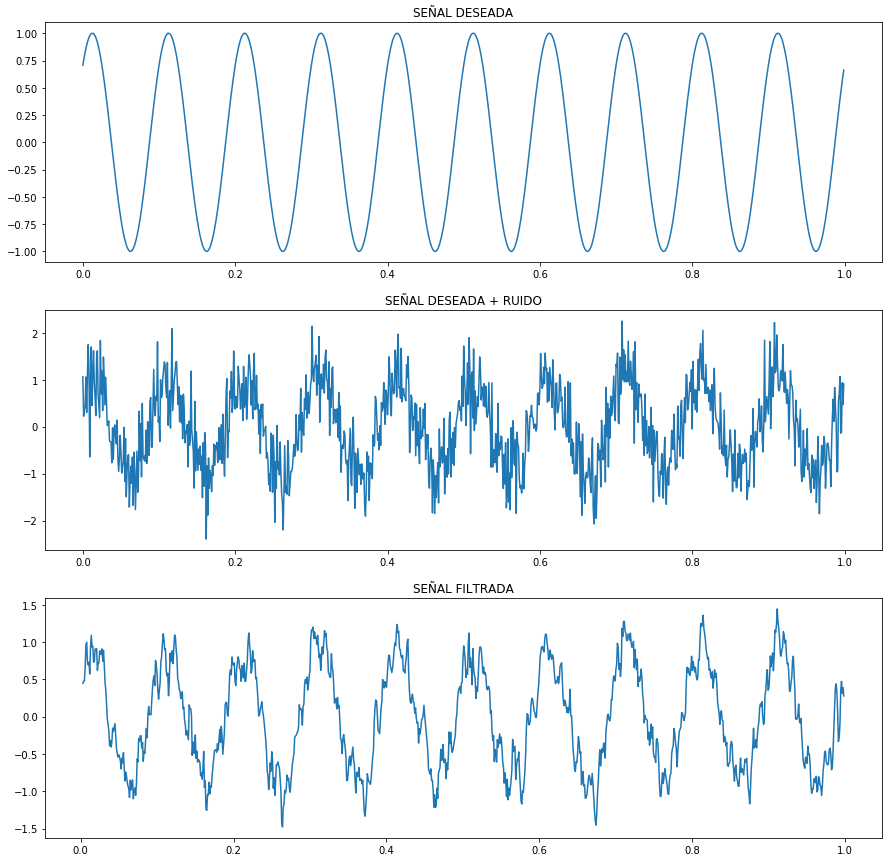

In [7]:
#Aumentos el ruido del sigma de entrada
sigma   = 0.5
ncoeffs = 4
f0      = 10 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[:1000],d[:1000])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[:1000],input_signal[:1000])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
plt.plot(tt_desired[:1000-ncoeffs],d_est[:1000-ncoeffs])

#Se ve que el ruido disminuye, pero todavia no es distinguible la señal de una manera mas agradable

ERROR CUADRATICO MEDIO MINIMO:25.956630881565616


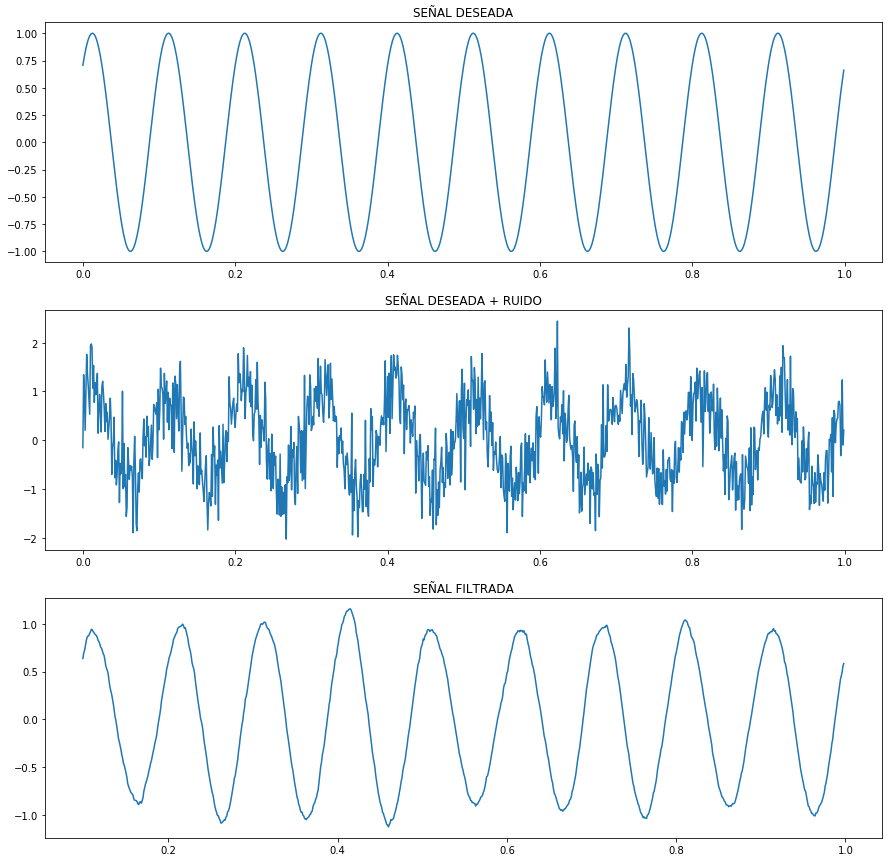

In [8]:
#Aumentos el ruido del sigma de entrada
sigma   = 0.5
ncoeffs = 100
f0      = 10 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[:1000],d[:1000])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[:1000],input_signal[:1000])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
plt.plot(tt_desired[:1000-ncoeffs],d_est[:1000-ncoeffs])

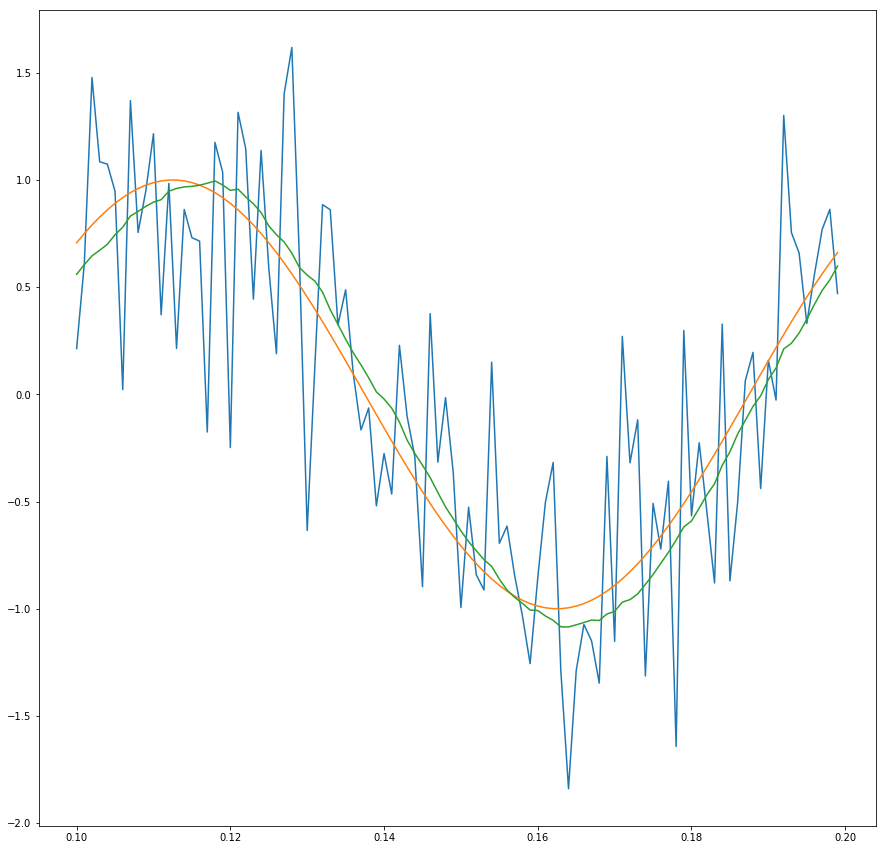

In [9]:
#Grafiquemos las 3 señales superpuesta, la deseada, la obtenida y la que tiene ruido, asi se nota el efecto del filtro.
plt.figure()
plt.plot(tt[100:200],input_signal[100:200])
plt.plot(tt[100:200],d[100:200])
#Para poner la alineamos colcoando zeros
d_est_zero = np.pad(d_est,(0,ncoeffs-1),'constant')
plt.plot(tt[100:200],d_est_zero[100:200])

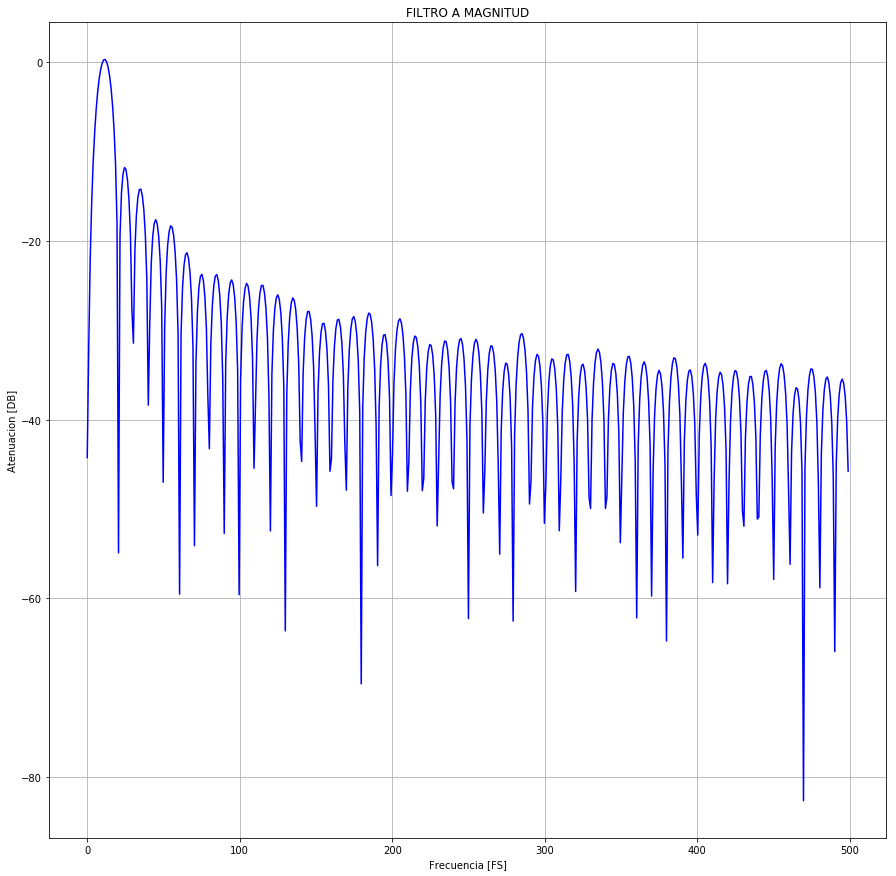

In [10]:
#Para tener mas claridad de que realiza el filtro encontramos interesante realizarle la respuesta en frecuencia
a = [1]
(w , h) = signal.freqz(W,a)
plt.figure()
plt.plot((fs * w / (2 * np.pi)), 20 * np.log10(abs(h)), 'b')
plt.title('FILTRO A MAGNITUD')
plt.xlabel('Frecuencia [FS]')
plt.ylabel('Atenuacion [DB]')
plt.grid()
plt.show()

#Por lo vemos de aca es que para una señal senoidal genera un filtro pasabanda de manera de sacar el ruido.

ERROR CUADRATICO MEDIO MINIMO:23.043271877992083


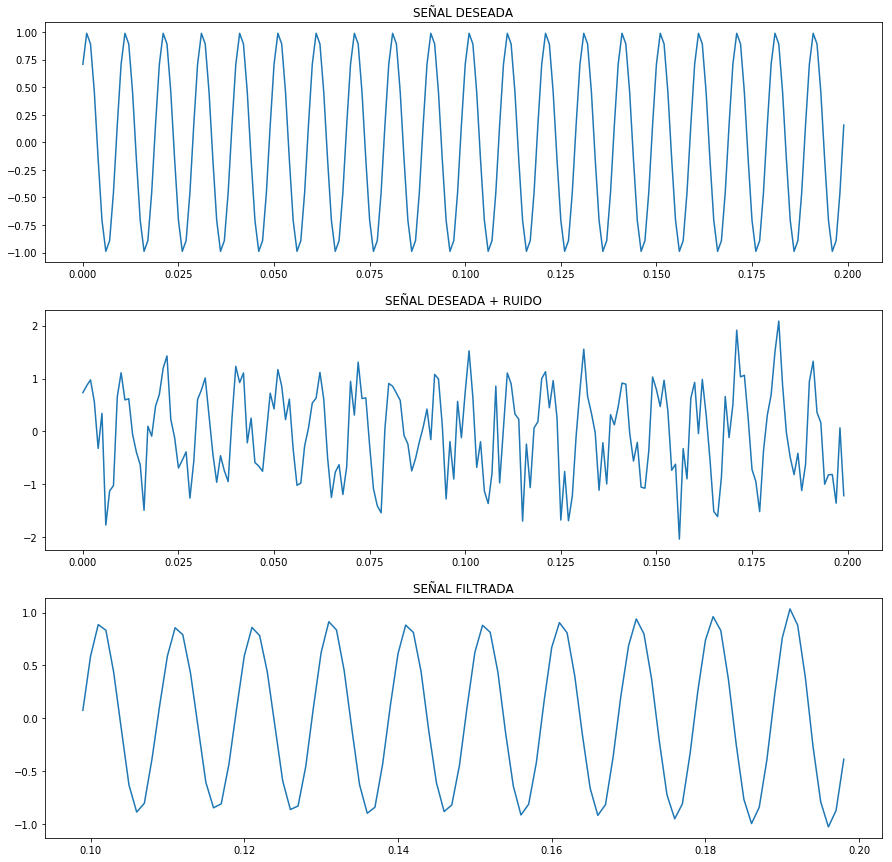

In [30]:
#Aumentos el ruido del sigma de entrada, subamosle la frecuencia de entrada
sigma   = 0.5
ncoeffs = 100
f0      = 100 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[:200],d[:200])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[:200],input_signal[:200])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
plt.plot(tt_desired[:200-ncoeffs],d_est[:200-ncoeffs])

#Tener en cuenta que el filtro como lo aplicamos nos quedamos sin las primeras 100 muestra, lo que origina un 
#desfasaje.La escalas son menores.

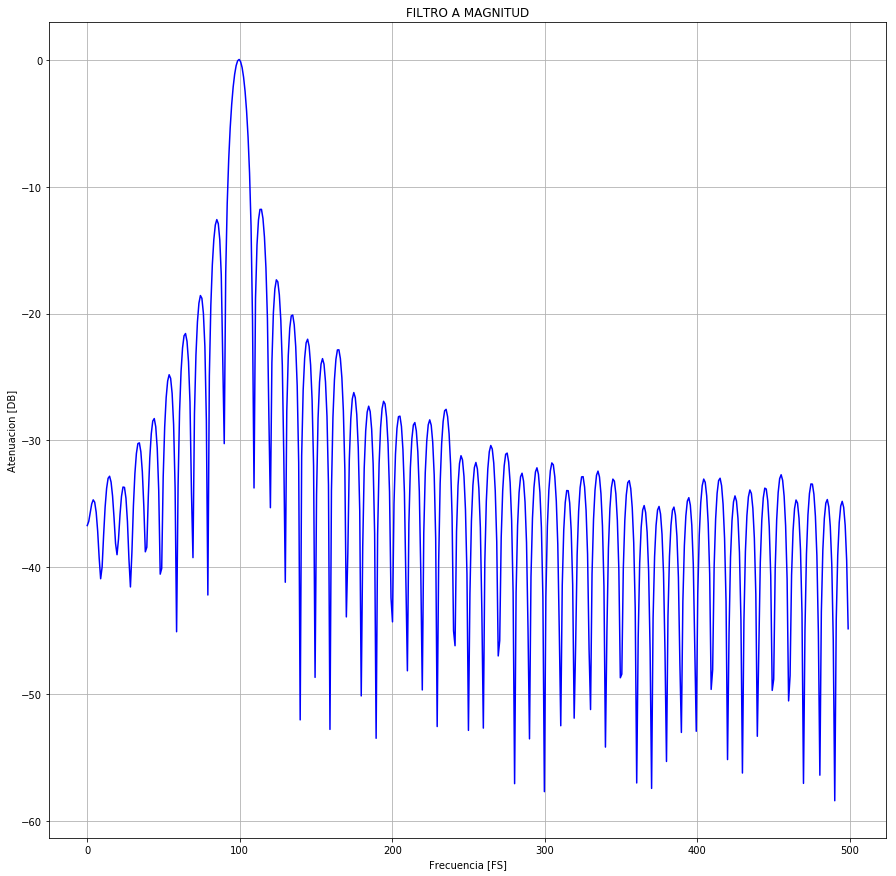

In [12]:
#Para tener mas claridad de que realiza el filtro encontramos interesante realizarle la respuesta en frecuencia
a = [1]
(w , h) = signal.freqz(W,a)
plt.figure()
plt.plot((fs * w / (2 * np.pi)), 20 * np.log10(abs(h)), 'b')
plt.title('FILTRO A MAGNITUD')
plt.xlabel('Frecuencia [FS]')
plt.ylabel('Atenuacion [DB]')
plt.grid()
plt.show()

#Al subir la frecuencia observamos que el filtro se corrio para poder seleccionar la frecuencia de 100Hz, para
#este caso. Vemos que le filtro se adapta de acuerdo a la señal que queremos tener.

ERROR CUADRATICO MEDIO MINIMO:47.76230024180313


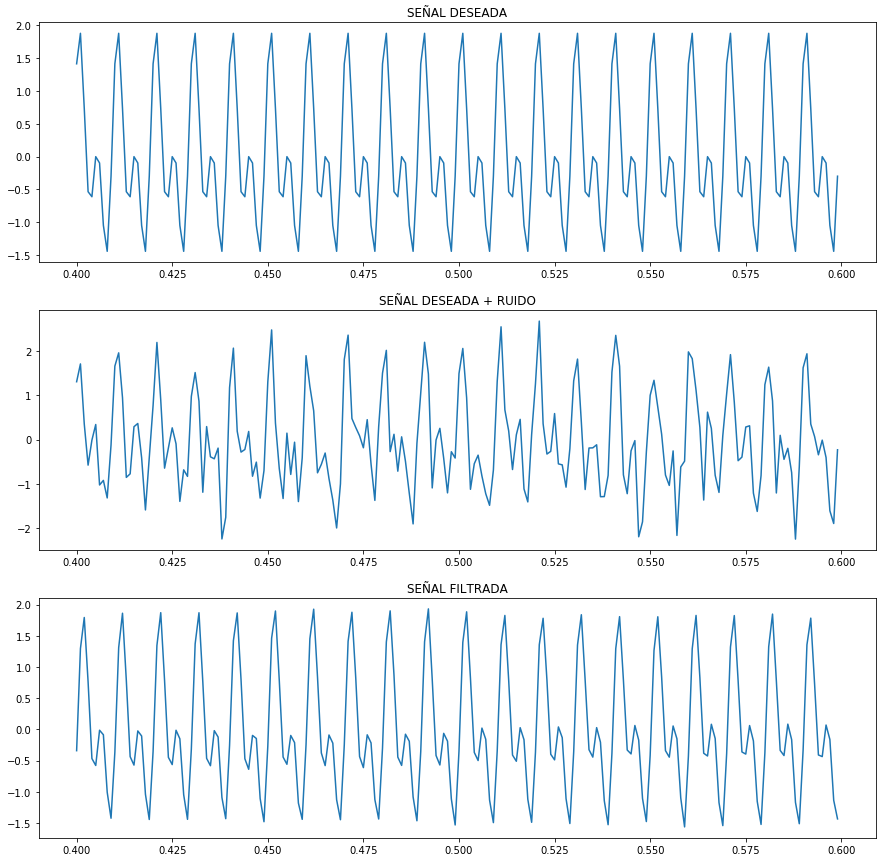

In [13]:
#Viendo esta capacidad ahora probemos con una señal que contenga dos senos de distinta frecuencia
#Aumentos el ruido del sigma de entrada, subamosle la frecuencia de entrada
sigma   = 0.5
ncoeffs = 100
f0      = 100 
f1      = 200
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4) + np.sin(2*f1*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[400:600],d[400:600])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[400:600],input_signal[400:600])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
#calibramos la duracion teniendo en mente un zero padding
d_est_zero = np.pad(d_est,(0,ncoeffs-1),'constant')
plt.plot(tt[400:600],d_est_zero[400:600])

#Como pusimos 2 senos, vemos que el error cuadratico medio aumento como consecuencia de que 
#el mismo filtro tiene que entrar para 2 BW distintos.

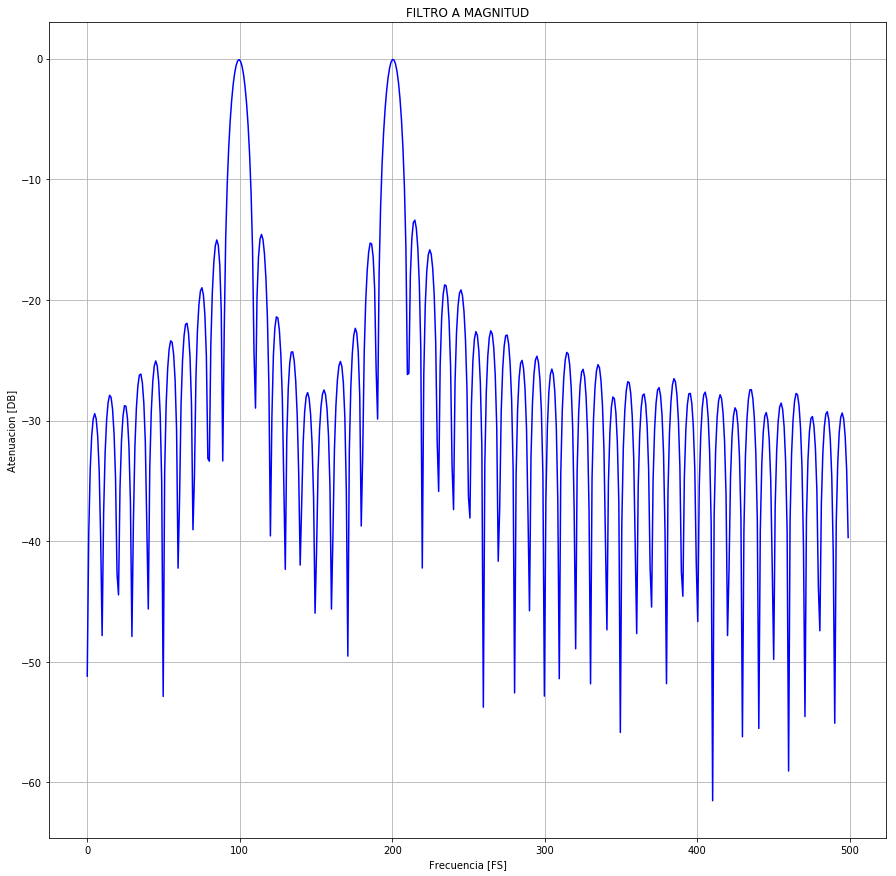

In [14]:
#Para tener mas claridad de que realiza el filtro encontramos interesante realizarle la respuesta en frecuencia
a = [1]
(w , h) = signal.freqz(W,a)
plt.figure()
plt.plot((fs * w / (2 * np.pi)), 20 * np.log10(abs(h)), 'b')
plt.title('FILTRO A MAGNITUD')
plt.xlabel('Frecuencia [FS]')
plt.ylabel('Atenuacion [DB]')
plt.grid()
plt.show()

#Vemos que aca se intentan filtrar 2 señales de 100 Hz y 200 Hz. QUedando dos pasabandas para estas 2 señales.

ERROR CUADRATICO MEDIO MINIMO 4   coeficientes:548.924914539238
ERROR CUADRATICO MEDIO MINIMO 254 coeficientes:10.674970120023772
ERROR CUADRATICO MEDIO MINIMO 496 coeficientes:4.643716085554388


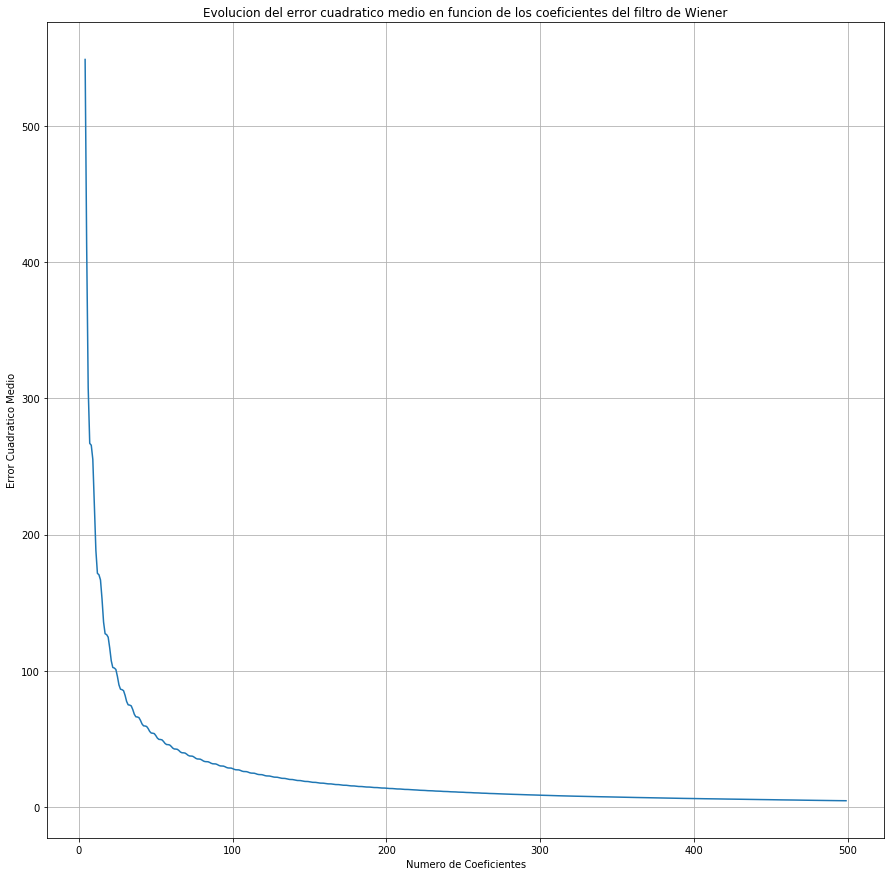

In [15]:
#Una pregunta que nos hicimos que pasa con el error cuadratico medio a medido que avanzamos.
#Viendo esta capacidad ahora probemos con una señal que contenga dos senos de distinta frecuencia
#Aumentos el ruido del sigma de entrada, subamosle la frecuencia de entrada
#Guarda que esto le puede llevar tiempo en calcular
sigma   = 0.5
ncoeffs = 100
f0      = 100 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))


#Calculemos el error MSE, para todos los posibles filtros yendo de 4 coeficientes a 500 calculamos el minimo
#error cuadratiuco medio
e_min_ARRAY = []
for i in np.arange(4,500):
    BH_BIS          = align_samples(input_signal,i)
    d_desired_slice = d[i-1:]
    e_min_ARRAY.append(minimum_mse(BH_BIS,d_desired_slice))
    
plt.figure()
plt.plot(np.arange(4,500),e_min_ARRAY)
plt.title('Evolucion del error cuadratico medio en funcion de los coeficientes del filtro de Wiener')
plt.xlabel('Numero de Coeficientes')
plt.ylabel('Error Cuadratico Medio')
plt.grid()

print('ERROR CUADRATICO MEDIO MINIMO 4   coeficientes:{}'.format(e_min_ARRAY[0]))
print('ERROR CUADRATICO MEDIO MINIMO 254 coeficientes:{}'.format(e_min_ARRAY[500//2]))
print('ERROR CUADRATICO MEDIO MINIMO 496 coeficientes:{}'.format(e_min_ARRAY[-1]))

#Claramente no es mucho lo que ganamos con subir al doble los coeficientes, tener en mente que la 
#inversion de matrices es un proceso computacional caro.

ERROR CUADRATICO MEDIO MINIMO:40.14712130630255


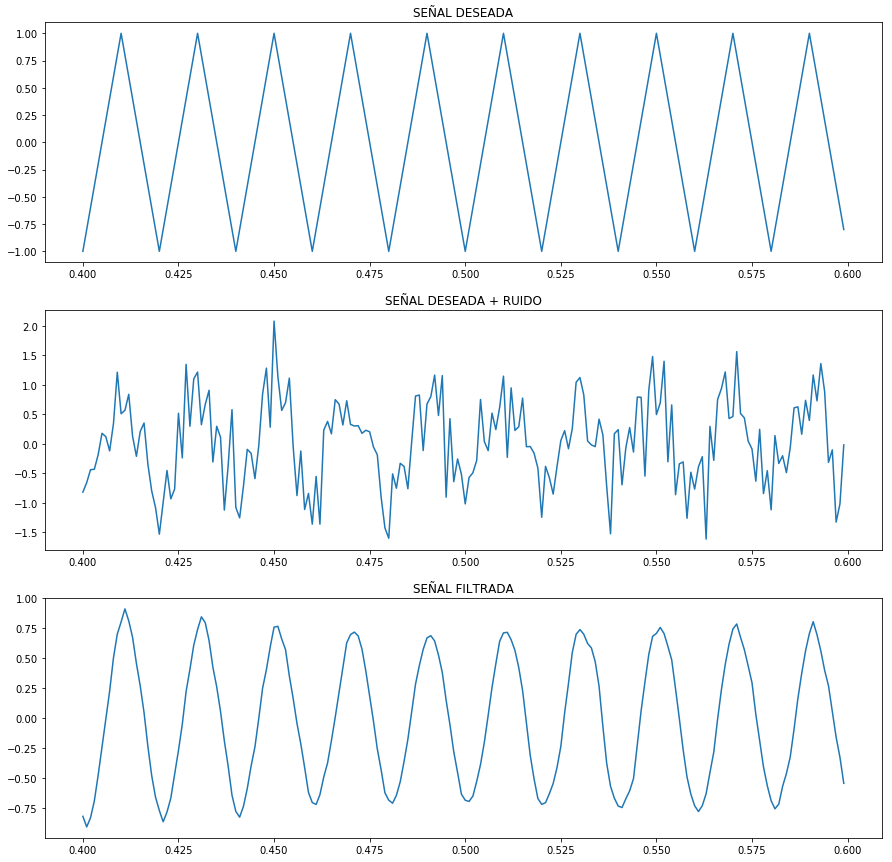

In [16]:
#Probemos el mismo filtro con una señal triangular para ver su funcionamiento.
#Viendo esta capacidad ahora probemos con una señal que contenga dos senos de distinta frecuencia
#Aumentos el ruido del sigma de entrada, subamosle la frecuencia de entrada
sigma   = 0.5
ncoeffs = 100
f0      = 50 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = signal.sawtooth(2 * np.pi * f0 * tt,0.5)
#Este es un subset de D que se toma a partir del ultimo
tt_desired      = tt[ncoeffs-1:]
d_desired       = d[ncoeffs-1:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[400:600],d[400:600])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[400:600],input_signal[400:600])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
#calibramos la duracion teniendo en mente un zero padding
d_est_zero = np.pad(d_est,(0,ncoeffs-1),'constant')
plt.plot(tt[400:600],d_est_zero[400:600])


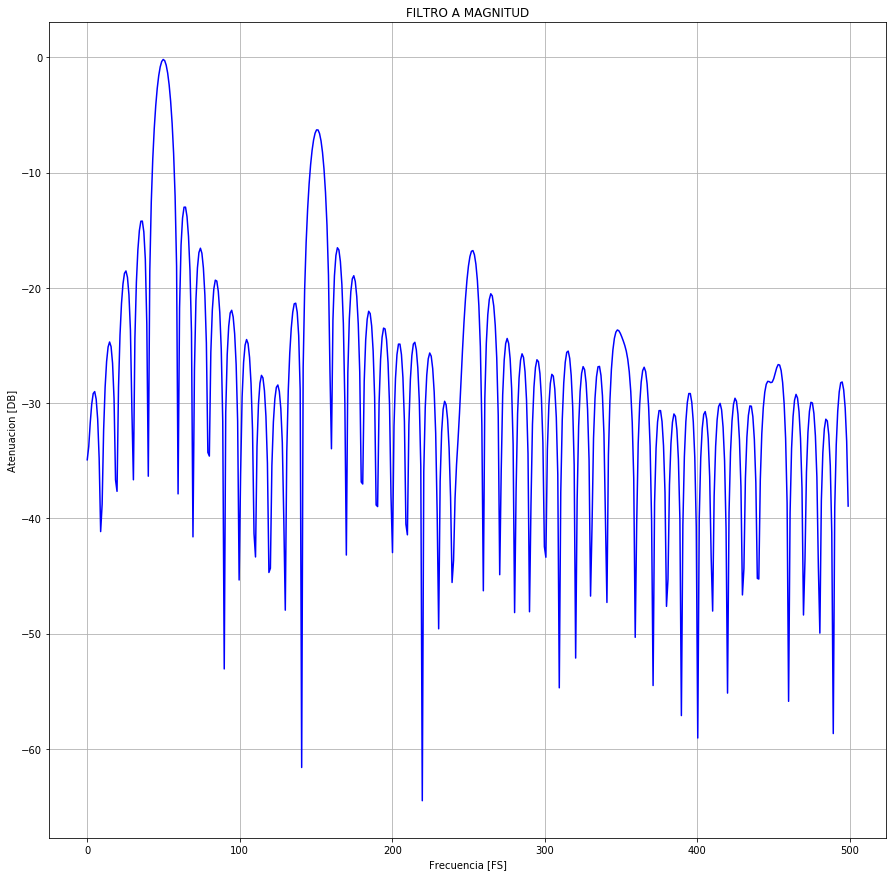

In [123]:
#Para tener mas claridad de que realiza el filtro encontramos interesante realizarle la respuesta en frecuencia
a = [1]
(w , h) = signal.freqz(W,a)
plt.figure()
plt.plot((fs * w / (2 * np.pi)), 20 * np.log10(abs(h)), 'b')
plt.title('FILTRO A MAGNITUD')
plt.xlabel('Frecuencia [FS]')
plt.ylabel('Atenuacion [DB]')
plt.grid()
plt.show()

#Muy interesante se acopla al espectro esperado de la señal

# PREDICTOR
### Lo que sucedio antes implementabamos un filtro ya que que alineabamos u(n) con u(n)..u(n-m), de esta manera se utilizan las muestras del filtro para estimar la actual. El predictor lo tenemos que hacer es predecir el valor de u(n+1) con u(n)...u(n-m)

ERROR CUADRATICO MEDIO MINIMO:26.53247870123232


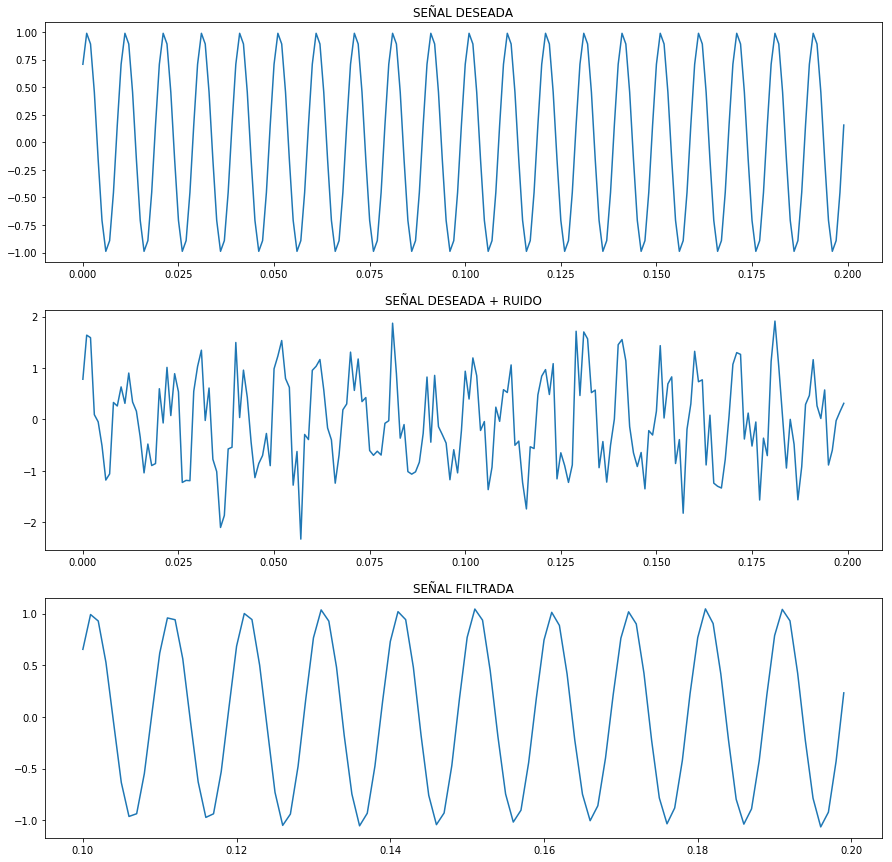

In [17]:
#Lo que hacemos es rehacer la funcion para alinear los samples, ahora es align_samples_predictor(), es ahora cuenta una 
#columna menos, lo que implica tambien tenemos que alinear distinto el vector de muestra deseadas
def align_samples_predictor(samples_vector,ncoeffs):
    #De tener 20 muestras y 4 Coeficientes del filtro, las columnas de AH son 16.
    #A[0:] = [samples_vector[3]; samples_vector[2]; samples_vector[1]; samples_vector[0]] 
    #--> Esto pasado por el filtro tiene que dar desired[4]
    #A[16:] = samples_vector[18]; samples_vector[17]; samples_vector[16]; samples_vector[15]] 
    #--> Esto pasado por el filtro tiene que dar desired[19]
    columns = np.size(samples_vector) - ncoeffs
    rows    = ncoeffs
    AH     = np.zeros((rows,columns))
    for i in np.arange(columns):
        AH[:,i] =samples_vector[np.arange(ncoeffs+i-1,-1+i,-1)]
    return AH  
#Aumentos el ruido del sigma de entrada, subamosle la frecuencia de entrada
sigma   = 0.5
ncoeffs = 100
f0      = 100 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Este es un subset de D que se toma a partir del ultimo. Como usamos otro predictor tenemos que empezar
#a ingresar como vector al u(M+1) --> El numero de muestras que tiene el filtro + 1 (Estamos prediciendo.)
tt_desired      = tt[ncoeffs:]
d_desired       = d[ncoeffs:]
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))

#Generamos y Aplicamos el filtro de wiener a la señal
plt.rcParams['figure.figsize'] = [15, 15]
AH    = align_samples_predictor(input_signal,ncoeffs)
W     = wiener_coeffs(AH,d_desired)
d_est = AH.transpose()@W
e_min = minimum_mse(AH,d_desired)
print('ERROR CUADRATICO MEDIO MINIMO:{}'.format(e_min))

plt.subplot(3,1,1)
plt.title('SEÑAL DESEADA')
plt.plot(tt[:200],d[:200])
plt.subplot(3,1,2)
plt.title('SEÑAL DESEADA + RUIDO')
plt.plot(tt[:200],input_signal[:200])
plt.subplot(3,1,3)
plt.title('SEÑAL FILTRADA')
plt.plot(tt_desired[:200-ncoeffs],d_est[:200-ncoeffs])

#Tener en cuenta que el filtro como lo aplicamos nos quedamos sin las primeras 100 muestra, lo que origina un 
#desfasaje.La escalas son menores.


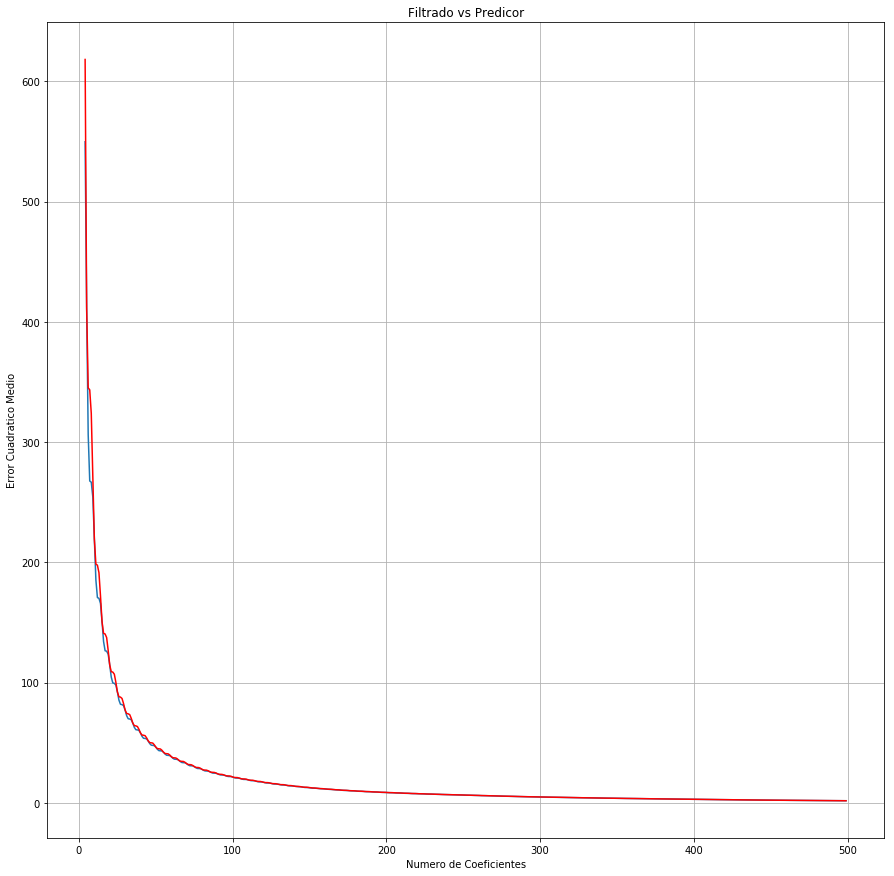

In [22]:
#Una pregunta que nos hicimos que pasa con el error cuadratico medio a medido que avanzamos.
#Viendo esta capacidad ahora probemos con una señal que contenga dos senos de distinta frecuencia
#Aumentos el ruido del sigma de entrada, subamosle la frecuencia de entrada
#Guarda que esto le puede llevar tiempo en calcular

####################################Filtrado####################################
sigma   = 0.5
ncoeffs = 100
f0      = 100 
fs      = 1000
ts      = 1/fs
t_max   = 5
N  = t_max*fs

#Vector con valores de tiempos
tt              = np.linspace(0,t_max,N,endpoint = False)
d               = np.sin(2*f0*np.pi*tt + np.pi/4)
#Esta señal es la deseada mas la señal con un ruido
input_signal    = d + np.random.normal(0,sigma,np.size(d))


#Calculemos el error MSE, para todos los posibles filtros yendo de 4 coeficientes a 500 calculamos el minimo
#error cuadratiuco medio
e_min_ARRAY = []
for i in np.arange(4,500):
    BH_BIS          = align_samples(input_signal,i)
    d_desired_slice = d[i-1:]
    e_min_ARRAY.append(minimum_mse(BH_BIS,d_desired_slice))
    
####################################Predictor####################################
e_min_ARRAY_predictor = []
for i in np.arange(4,500):
    CH_BIS          = align_samples_predictor(input_signal,i)
    d_desired_slice = d[i:]
    e_min_ARRAY_predictor.append(minimum_mse(CH_BIS,d_desired_slice))
    
plt.figure()
plt.plot(np.arange(4,500),e_min_ARRAY)
plt.plot(np.arange(4,500),e_min_ARRAY_predictor,'r')
plt.title('Filtrado vs Predicor')
plt.xlabel('Numero de Coeficientes')
plt.ylabel('Error Cuadratico Medio')
plt.grid()


ERROR CUADRATICO MEDIO MINIMO (Filtro) 100 coeficientes:20.98644544373792
ERROR CUADRATICO MEDIO MINIMO (Predictor) 100 coeficientes:21.110920345639897


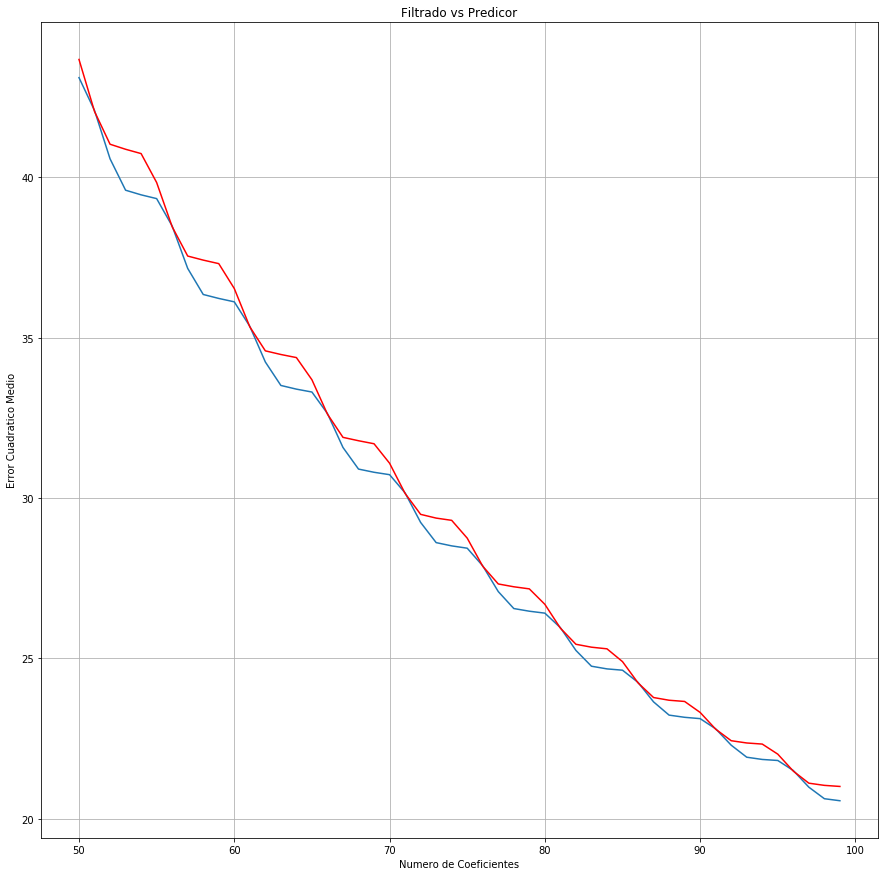

In [31]:
plt.figure()
plt.plot(np.arange(50,100),e_min_ARRAY[50:100])
plt.plot(np.arange(50,100),e_min_ARRAY_predictor[50:100],'r')
plt.title('Filtrado vs Predicor')
plt.xlabel('Numero de Coeficientes')
plt.ylabel('Error Cuadratico Medio')
plt.grid()

print('ERROR CUADRATICO MEDIO MINIMO (Filtro) 100 coeficientes:{}'.format(e_min_ARRAY[101-4]))
print('ERROR CUADRATICO MEDIO MINIMO (Predictor) 100 coeficientes:{}'.format(e_min_ARRAY_predictor[101-4]))